In [363]:
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt

## Basic info

- survival	Survival	0 = No, 1 = Yes
- pclass	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	        Sex	
- Age	        Age in years	
- sibsp	    # of siblings / spouses aboard the Titanic	
- parch	    # of parents / children aboard the Titanic	
- ticket	    Ticket number	
- fare	    Passenger fare	
- cabin	    Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

for age 
- Mr. (for men of all the ages)

- Miss. (for women not married, so mainly child and young women)

- Mrs. (for married women, so with an higher average age)

- Master. (for male children, an old form of invitation, not used anymore)

- Other like Rev., Col. Sir. Dr.  etc... that I have called "Professional", mainly male and with an high age.

In [364]:
df = pd.read_csv('train.csv')

In [365]:
df_test = pd.read_csv('test.csv')

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


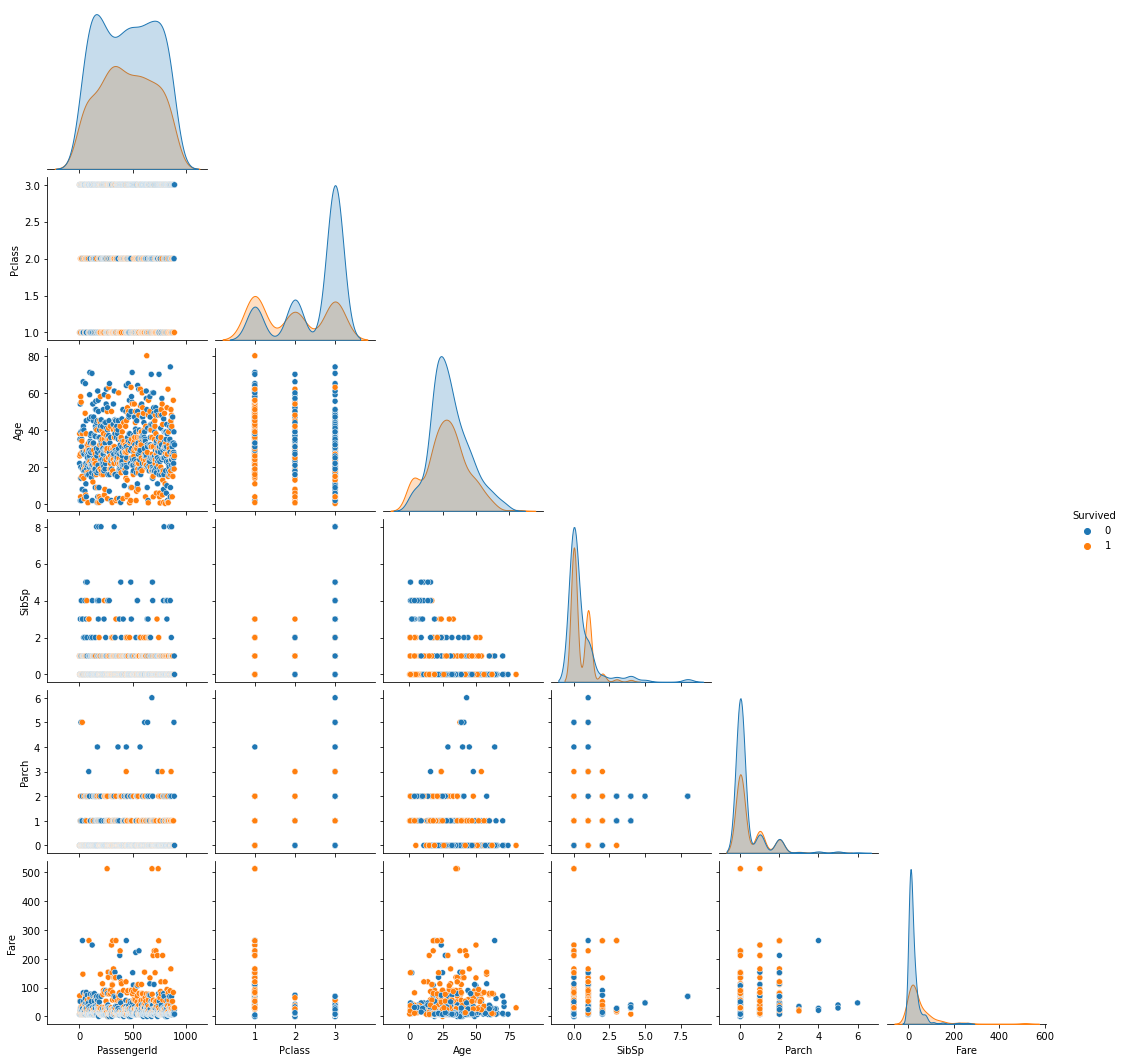

In [367]:
sns.pairplot(df,hue='Survived',corner=True)

# Feature engineering for training data 

Dealing with missing data(visualization)

In [368]:
def null_plot(df):
    df_null = (100 * df.isnull().sum() / len(df))
    df_null = df_null[df_null > 0].sort_values()
    sns.barplot(x=df_null.index, y=df_null)
    plt.xticks(rotation=90)
    plt.ylabel('null percentage')

### checking df missing values

- Mr. (for men of all the ages)

- Miss. (for women not married, so mainly child and young women)

- Mrs. (for married women, so with an higher average age)

- Master. (for male children, an old form of invitation, not used anymore)

- Other like Rev., Col. Sir. Dr.  etc... that I have called "Professional", mainly male and with an high age.

In [369]:
# Before we check for missing values, lets first convert passengers' names 
# in the data set into reasonable value
def name(n):
    if 'Mrs' in n:
        return 'Mrs'
    elif 'Miss' in n:
        return 'Miss'
    elif 'Mr' in n:
        return 'Mr'
    elif 'Master' in n:
        return 'Master'
    else:
        return 'Professional'

In [370]:
# Convert both training and testing data names variables

In [371]:
df['Name'] = df['Name'].apply(name)

In [372]:
df_test['Name'] = df_test['Name'].apply(name)

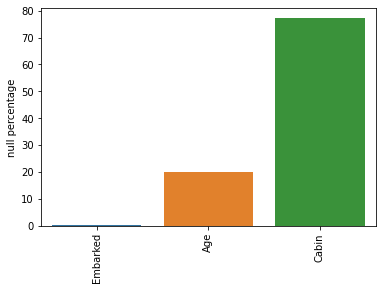

In [373]:
null_plot(df)

In [374]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,Mrs,female,62.0,0,0,113572,80.0,B28,NaN


In [375]:
df[df['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,Mrs,female,62.0,0,0,113572,80.0,B28,NaN


In [376]:
df.at[61,'Embarked'] = 'S'

In [377]:
df.at[829,'Embarked'] = 'S'

### Age
we start at survived=1

<AxesSubplot:xlabel='Name', ylabel='Age'>

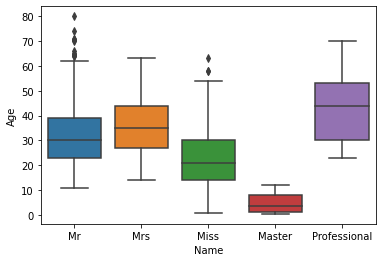

In [378]:
sns.boxplot(x='Name',y='Age',data=df)

In [379]:
def fill_age(n,age):
    if np.isnan(age):
        if n == 'Mr':
            return 31.0
        elif n == 'Mrs':
            return 35.0
        elif n == 'Miss':
            return 21.0
        elif n == 'Master':
            return 3.5
        else:
            return 44.0
    else:
        return age

In [380]:
# Assign null values to age
df['Age'] = np.vectorize(fill_age)(df['Name'],df['Age'])

### Cabin

In [381]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [382]:
# map Cabin with letters
df['Cabin'] = df['Cabin'].str[:1]

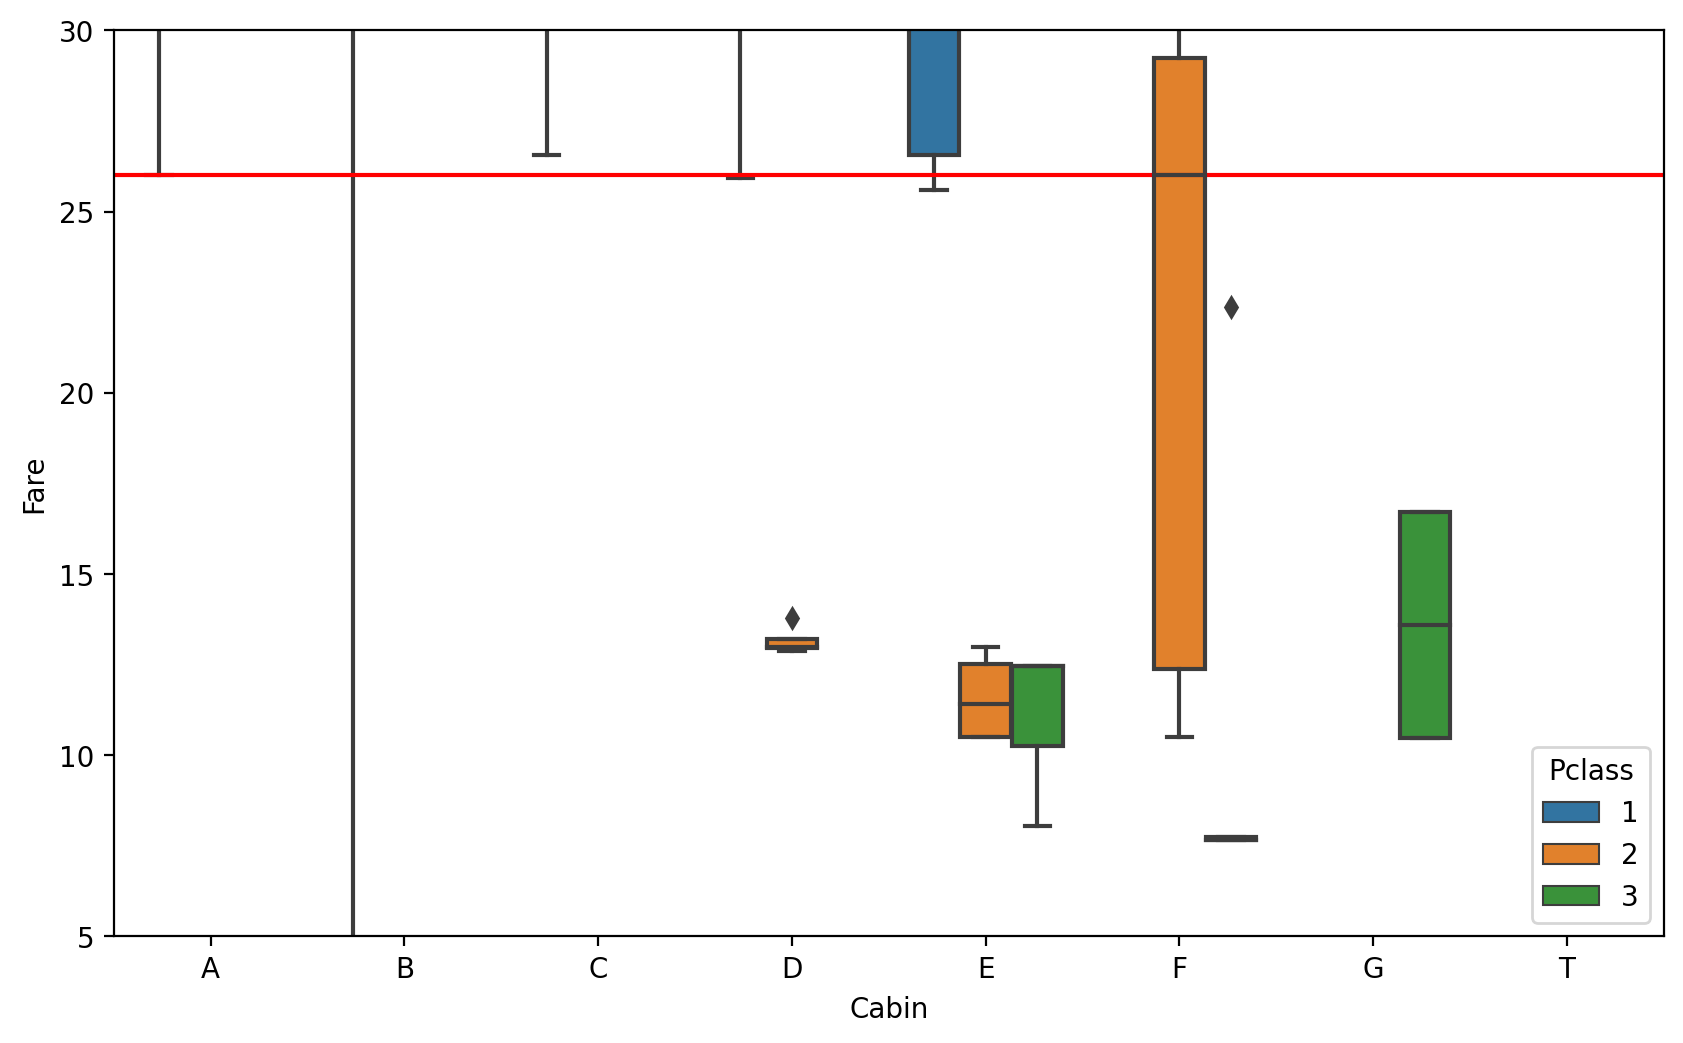

In [383]:
plt.figure(figsize=(10,6),dpi=200)
k = sns.boxplot(x='Cabin',y='Fare',data=df,order=['A','B','C','D','E','F','G','T'],hue='Pclass')
k.set_ylim(5,30)
plt.axhline(y=26,color='r')

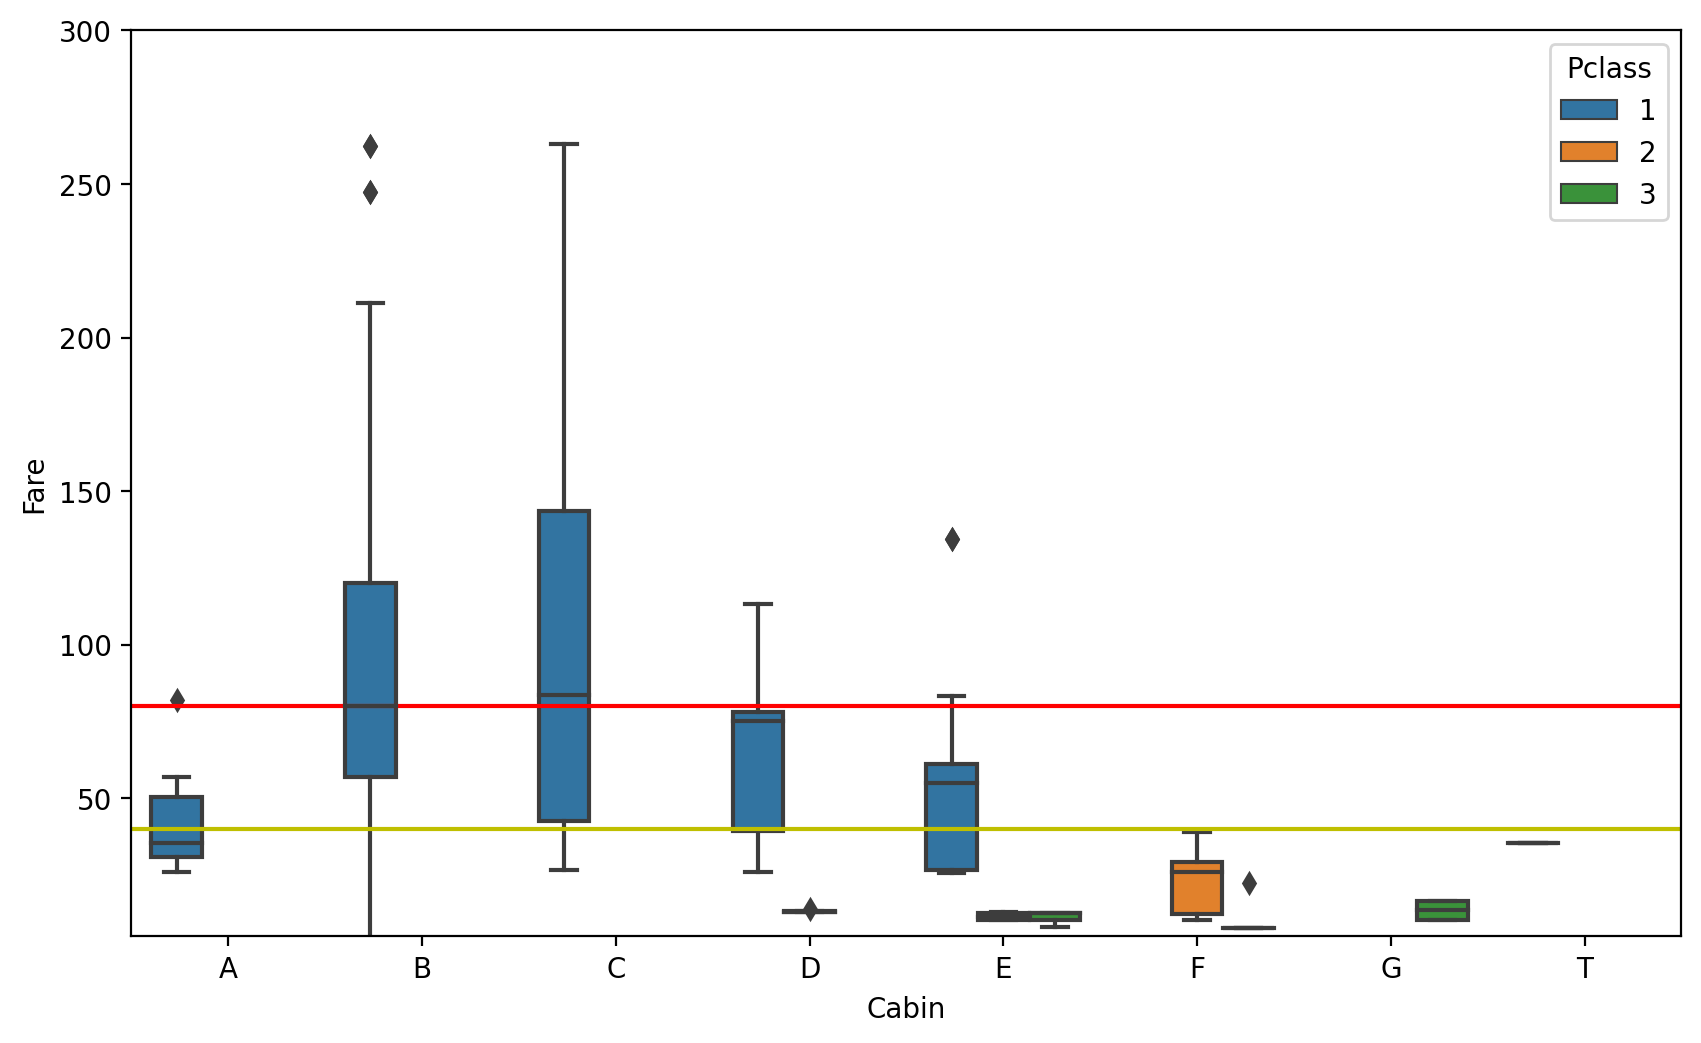

In [384]:
plt.figure(figsize=(10,6),dpi=200)
k = sns.boxplot(x='Cabin',y='Fare',data=df,order=['A','B','C','D','E','F','G','T'],hue='Pclass')
k.set_ylim(5,300)
plt.axhline(y=80,color='r')
plt.axhline(y=40,color='y')

In [385]:
# group similar Cabin together
def group(n):
    if n in ['A','E','D']:
        return 'ADE'
    elif n in ['B','C']:
        return 'BC'
    else:
        return n

In [386]:
df['Cabin'] = df['Cabin'].apply(group)

In [387]:
#Assign null data into new Cabin

# if Pclass=2, fare <= 13: assign to E
# if Pclass=2, fare > 13: assign to F

# if Pclass=3, fare <= 12.5: assign to E
# if Pclass=3, fare > 12.5: assign to G

# Others: 
# if Pclass=1, fare <= 40: assign to ADE
# if Pclass=1, 80>= fare >40: assign to BC
# if Pclass=1, fare > 80: assign to BC

In [388]:
def assign_cabin(pclass,fare,cabin):
    if pd.isnull(cabin):
        if pclass == 2 and fare <= 13:
            return 'E'
        elif pclass == 2 and fare > 13:
            return 'F'

        elif pclass == 3 and fare <= 12.5:
            return 'E'
        elif pclass == 3 and fare > 12.5:
            return 'G'

        elif pclass == 1 and fare <= 40:
            return 'ADE'
        elif pclass == 1 and (80 >= fare > 40):
            return 'BC'
        elif pclass == 1 and fare > 80:
            return 'BC'
    else:
        return cabin

In [389]:
# Assign null values to Cabin
df['Cabin'] = np.vectorize(assign_cabin)(df['Pclass'], df['Fare'],df['Cabin'])

In [390]:
# now we have no missing values in training data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### checking df_test missing values

### Fare

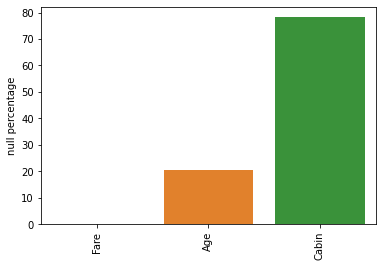

In [391]:
null_plot(df_test)

In [392]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,Mr,male,60.5,0,0,3701,NaN,NaN,S


In [393]:
df_test[(df_test['Pclass'] == 3) & (df_test['Age'] > 40)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
19,911,3,Mrs,female,45.0,0,0,2696,7.2250,NaN,C
25,917,3,Mr,male,50.0,1,0,A/5. 3337,14.5000,NaN,S
42,934,3,Mr,male,41.0,0,0,SOTON/O.Q. 3101263,7.8500,NaN,S
134,1026,3,Mr,male,43.0,0,0,349226,7.8958,NaN,S
152,1044,3,Mr,male,60.5,0,0,3701,NaN,NaN,S
228,1120,3,Mr,male,40.5,0,0,C.A. 6212,15.1000,NaN,S
309,1201,3,Mrs,female,45.0,1,0,350026,14.1083,NaN,S


In [394]:
fare = df[(df['Pclass'] == 3) & (df['Age'] > 58)]['Fare'].median()

In [395]:
df_test.at[152,'Fare'] = fare

### Age

In [396]:
# Assign null values to age
df_test['Age'] = np.vectorize(fill_age)(df_test['Name'],df_test['Age'])

### Cabin

In [397]:
# map Cabin with letters
df_test['Cabin'] = df_test['Cabin'].str[:1]

In [398]:
# group similar cabin together
df_test['Cabin'] = df_test['Cabin'].apply(group)

In [399]:
# Assign null values to Cabin
df_test['Cabin'] = np.vectorize(assign_cabin)(df_test['Pclass'], df_test['Fare'],df_test['Cabin'])

In [400]:
# no missing values in df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Final data sets editing

In [401]:
# drop Ticket column for both sets
df = df.drop(['Ticket'],axis=1)
df_test = df_test.drop('Ticket',axis=1)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Scale and train test split

In [403]:
from sklearn.model_selection import train_test_split

In [404]:
# for training set we use X y
X = df.drop(['PassengerId','Survived'],axis=1)
y = df['Survived']
# for testing set we use X_final
X_final = df_test.drop('PassengerId',axis=1)

In [405]:
def Cabin_trans(n):
    if n == 'G':
        return 0
    if n == 'F':
        return 1
    if n == 'E':
        return 2
    else:
        return 3

In [406]:
X['Cabin'] = X['Cabin'].apply(Cabin_trans)
X_final['Cabin'] = X_final['Cabin'].apply(Cabin_trans)

In [407]:
def sex_trans(n):
    if n == 'male':
        return 0
    else:
        return 1

In [408]:
X['Sex'] = X['Sex'].apply(sex_trans)
X_final['Sex'] = X_final['Sex'].apply(sex_trans)

In [409]:
FINAL_X = X

In [410]:
FINAL_y = y

In [411]:
# Splitting for traing df
# 50% --> X, y
# 25% --> X_test, y_test  25% --> X_eval, y_eval

# First half for model training
X, X_first_test, y, y_first_test = train_test_split(X, y, test_size=0.7, random_state=100)
# Second half for model testing and evaluating
X_test, X_eval, y_test, y_eval = train_test_split(X_first_test, y_first_test, test_size=0.5, random_state=100)

#### Scaling for distance based classifier

In [412]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [413]:
from sklearn.compose import make_column_transformer

In [414]:
column_trans = make_column_transformer(
    (OneHotEncoder(),['Name','Sex','Cabin','Embarked']),
    (StandardScaler(),['Pclass','Age','SibSp','Parch','Fare'])
    ,remainder='drop')

In [415]:
# Scaling
# training
scaled_X = column_trans.fit_transform(X)
scaled_X_test = column_trans.fit_transform(X_test)
scaled_X_eval = column_trans.fit_transform(X_eval)

# testing
scaled_X_final = column_trans.fit_transform(X_final)

In [416]:
# Note
# for training:
# 70% scaled_X, y
# 50% scaled_X_test, y_test
# 50% scaled_X_eval, y_eval

# for testing:
# 100% scaled_X_final

# Train and test on training data set

### We will be testing:
- Logistic regression
- Randomforest classifier
- KNN
- SVC

In [417]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

#### Logistic regression

In [418]:
from sklearn.linear_model import LogisticRegression

In [419]:
log_model = LogisticRegression()

In [420]:
log_param_grid = {'penalty':['l1', 'l2'],'C':np.logspace(-4, 4, 50)}

In [421]:
log_grid_model = GridSearchCV(estimator=log_model,param_grid=log_param_grid)

In [422]:
log_grid_model.fit(scaled_X,y)

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [423]:
log_grid_model.best_params_

{'C': 0.08685113737513521, 'penalty': 'l2'}

In [424]:
# for testing set
pred_test = log_grid_model.predict(scaled_X_test)

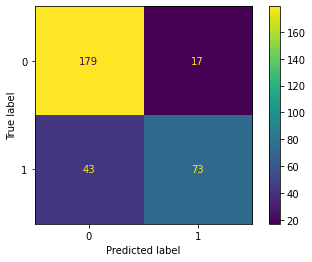

In [425]:
# evaluation
plot_confusion_matrix(log_grid_model,scaled_X_test,y_test)

## Logistic regression model performance:

- test set: 0.79
- eval set: 0.88

#### KNN

In [426]:
from sklearn.neighbors import KNeighborsClassifier

In [427]:
knn = KNeighborsClassifier()

In [428]:
knn_param_grid = {'n_neighbors':list(range(1,30)),'weights':['uniform','distance']}

In [429]:
knn_grid_model = GridSearchCV(estimator=knn,param_grid=knn_param_grid,scoring='accuracy')

In [430]:
knn_grid_model.fit(scaled_X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [431]:
knn_grid_model.best_params_

{'n_neighbors': 11, 'weights': 'uniform'}

In [432]:
# for testing set
pred_test = knn_grid_model.predict(scaled_X_test)

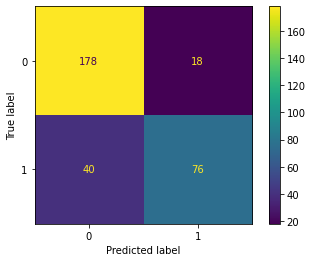

In [433]:
# evaluation
plot_confusion_matrix(knn_grid_model,scaled_X_test,y_test)

In [434]:
accuracy_score(y_test,pred_test)

0.8141025641025641

In [435]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       196
           1       0.81      0.66      0.72       116

    accuracy                           0.81       312
   macro avg       0.81      0.78      0.79       312
weighted avg       0.81      0.81      0.81       312



In [436]:
# for eval set
pred_eval = knn_grid_model.predict(scaled_X_eval)

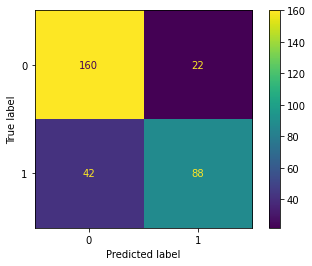

In [437]:
# evaluation
plot_confusion_matrix(knn_grid_model,scaled_X_eval,y_eval)

In [438]:
accuracy_score(y_eval,pred_eval)

0.7948717948717948

In [439]:
print(classification_report(y_eval,pred_eval))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       182
           1       0.80      0.68      0.73       130

    accuracy                           0.79       312
   macro avg       0.80      0.78      0.78       312
weighted avg       0.80      0.79      0.79       312



## KNN model performance:

- test set: 0.75
- eval set: 0.75

In [440]:
# one-hot-encoding for categorical column
scaled_cat_X = pd.get_dummies(X)
scaled_cat_X_test = pd.get_dummies(X_test)
scaled_cat_X_eval = pd.get_dummies(X_eval)

scaled_cat_X_final = pd.get_dummies(X_final)

In [441]:
scaled_cat_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 132 to 520
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             267 non-null    int64  
 1   Sex                267 non-null    int64  
 2   Age                267 non-null    float64
 3   SibSp              267 non-null    int64  
 4   Parch              267 non-null    int64  
 5   Fare               267 non-null    float64
 6   Cabin              267 non-null    int64  
 7   Name_Master        267 non-null    uint8  
 8   Name_Miss          267 non-null    uint8  
 9   Name_Mr            267 non-null    uint8  
 10  Name_Mrs           267 non-null    uint8  
 11  Name_Professional  267 non-null    uint8  
 12  Embarked_C         267 non-null    uint8  
 13  Embarked_Q         267 non-null    uint8  
 14  Embarked_S         267 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 18.8 KB


#### Randomforest classifier

In [442]:
from sklearn.ensemble import RandomForestClassifier

In [443]:
rfc = RandomForestClassifier()

In [444]:
rfc.fit(scaled_cat_X,y)

RandomForestClassifier()

In [445]:
pred_test = rfc.predict(scaled_cat_X_test)

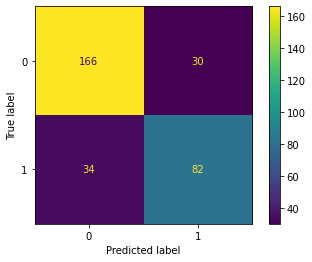

In [446]:
plot_confusion_matrix(rfc,scaled_cat_X_test,y_test)

In [447]:
accuracy_score(y_test,pred_test)

0.7948717948717948

#### SVC

In [448]:
from sklearn.svm import SVC

In [449]:
svc = SVC()

only for cat scaled x

In [450]:
svc.fit(scaled_cat_X,y)

SVC()

In [451]:
pred_test = svc.predict(scaled_cat_X_test)

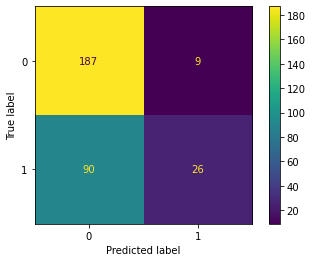

In [452]:
plot_confusion_matrix(svc,scaled_cat_X_test,y_test)

In [453]:
accuracy_score(y_test,pred_test)

0.6826923076923077

# Its clear that logistic regression performed the best

In [454]:
model = LogisticRegression()

In [455]:
param_grid = {'penalty':['l1', 'l2'],
              'C':np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'dual':[True,False],
              'class_weight' :['balanced',None]}

In [456]:
log_model = GridSearchCV(model,param_grid=param_grid)

In [457]:
log_model.fit(scaled_X,y)

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver sag supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py", line 821,

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (m

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py", line 821,

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py", line 821,

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("T

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Est

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver newton-cg supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver sag supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Est

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/aristo/opt/anaconda3/envs

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("T

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/arist

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver lbfgs supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this tra

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("T

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-0...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'class_weight': ['balanced', None],
                         'dual': [True, False], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [458]:
log_model.best_params_

{'C': 0.08685113737513521,
 'class_weight': None,
 'dual': False,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [459]:
pred = log_model.predict(scaled_X_test)

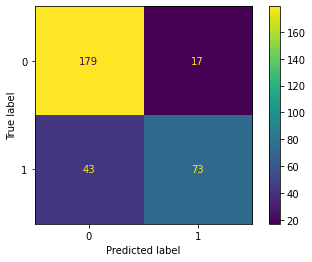

In [460]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [461]:
pred_eval = log_model.predict(scaled_X_eval)

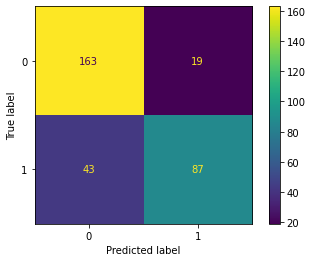

In [462]:
plot_confusion_matrix(log_model,scaled_X_eval,y_eval)

In [463]:
new_model = LogisticRegression()

In [464]:
new_model.fit(scaled_X,y)

LogisticRegression()

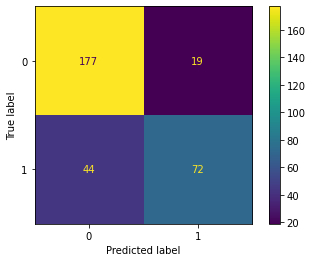

In [465]:
plot_confusion_matrix(new_model,scaled_X_test,y_test)

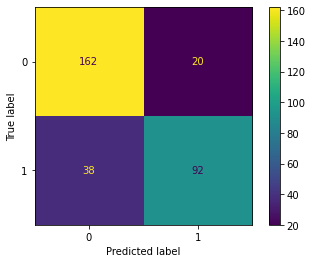

In [466]:
plot_confusion_matrix(new_model,scaled_X_eval,y_eval)

# After research

In [467]:
# now, we only hot encoding name and Embark
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)
X_eval = pd.get_dummies(X_eval)

X_final = pd.get_dummies(X_final)

In [468]:
# Retrain our model

In [469]:
from sklearn.linear_model import LogisticRegressionCV 

In [470]:
log_model = LogisticRegression(max_iter=10000)

In [471]:
log_model.fit(X,y)

LogisticRegression(max_iter=10000)

In [472]:
pred = log_model.predict(X_test)

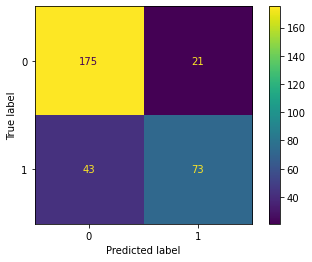

In [473]:
plot_confusion_matrix(log_model,X_test,y_test)

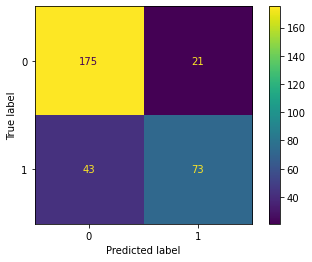

In [474]:
plot_confusion_matrix(log_model,X_test,y_test)

In [475]:
param_grid = {'C':np.logspace(-4, 4, 50),'penalty': ['l1', 'l2']}

In [476]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [477]:
grid_model.fit(X,y)

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristo/opt/anaconda3/envs/DS_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [478]:
grid_model.best_params_

{'C': 1.2067926406393288, 'penalty': 'l2'}

In [479]:
pred = grid_model.predict(X_test)

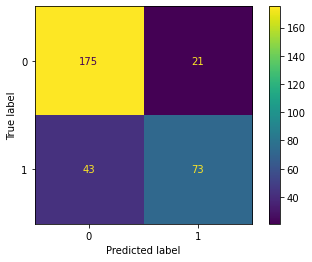

In [480]:
plot_confusion_matrix(grid_model,X_test,y_test)

# Final model

In [481]:
FINAL_X = pd.get_dummies(FINAL_X)

In [487]:
final_model = LogisticRegression(max_iter=1000)

In [488]:
final_model.fit(FINAL_X,FINAL_y)

LogisticRegression(max_iter=1000)

# Predict the final csv

In [490]:
final_prediction = final_model.predict(X_final)

In [500]:
dic = {'PassengerId':df_test.PassengerId,
      'Survived':final_prediction}

In [506]:
final_csv = pd.DataFrame(data=dic,index=None)

In [513]:
final_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [508]:
final_csv.to_csv('final_submission.csv',index=False)

In [511]:
pd.read_csv('final_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [512]:
pd.read_csv('submission.csv')

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
